In [33]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [31]:
start = '2026-01-01'
end = '2026-02-05'

ticker = '4GLD.DE'
info = yf.Ticker(ticker).info
currency = info['currency']
timezone = info['exchangeTimezoneName']

history = yf.Ticker(ticker).history(
    start=start,
    end=end,
    interval='1d'
)[['Open', 'Close']]

exchange_rates = yf.Ticker(f'{currency}PLN=X').history(
    start=start,
    end=end,
    interval='1d'
)[['Open', 'Close']]

exchange_rates.index = exchange_rates.index.tz_convert(timezone).floor('D')

history = history.join(exchange_rates, how='left', rsuffix=(f'_{currency}PLN'))

<Axes: xlabel='Date'>

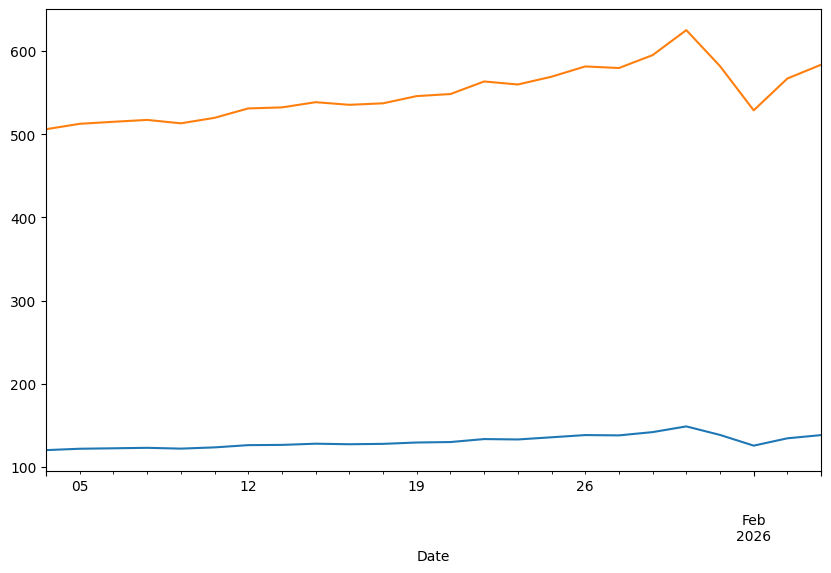

In [35]:
plt.figure(figsize=(10, 6))

ax = plt.gca()
ax.grid(visible=True)

history['Open'].plot(ax=ax)
(history['Open']*history[f'Open_{currency}PLN']).plot(ax=ax)